# Shuffling Arnold's Cat

This Jupyter notebook presents a few basic features of Python.  It is intended as a review and reminder of some material which was covered in PHYS381.  

Read through the examples below to make sure that you understand what the code does.  Also try to think about alternative ways of achieving the same outcome.

There are several questions at the end.  Students may work individually or in pairs; please submit only one set of answers per pair.  

Deadline TBD

<!-- begin HTML comment

 Place your answers in a Jupyter notebook and submit it to the course D2L dropbox before midnight Sunday September 17.

end HTML comment -->


In [1]:
# There are several packages which get used so frequently that
# we should just include them automatically.
#

import numpy as np

# tools for plotting with "magic" (%) ipython configuration
#
import matplotlib.pyplot as plt
%matplotlib inline

## Data structures

The Python builtin container types are tuple, list, dict, set, frozenset and str and unicode (or bytes and str in Python 3), as well as a couple other constructs that are not commonly used outside of specific contexts (e.g., buffer objects and xrange objects).

In [2]:
# Create lists and tuples using functions
#
a = list([1,2,3])
b = tuple([1,2,3])
print( type(a), '\n', type(b) )

<class 'list'> 
 <class 'tuple'>


In [3]:
# Use square brackets to make a list, round brackets for tuple
#
a = [1,2,3]
b = (1,2,3)
print( type(a), '\n', type(b) )

<class 'list'> 
 <class 'tuple'>


In [4]:
# List indexing: extract individual elements from a list,
# or a range of elements, or the entire list.
#
a = [1,2,3,4,5,6]
print( a[0], a[2] )
print( a[0:2] )
print( a[::2])
print( a[:] )

1 3
[1, 2]
[1, 3, 5]
[1, 2, 3, 4, 5, 6]


In [5]:
# A negative index means to start from the end of the list 
# and work backwards
#
print( a[-1] )

6


## Equality and identity

Are two lists (or tuples, or dicts...) the same?

They will be *equal* if all of the elements are equal using the == operator.

They will be *identical* if both variables correspond to the same locations in memory.

This is a very important consideration.  It can be useful to avoid making unnecessary copies of large data sets.  However, it can lead to confusion when changing one variable also modifies others.

In [6]:
# two variables sharing the same data
#
a = [0,1,2,3,4]
b = a
b == a , b is a

(True, True)

In [7]:
# two different variables with equal but not identical contents
#
b = a.copy()
b == a , b is a

(True, False)

In [8]:
# equivalent to copying: make another list with equal contents
#
b = a[:]
b == a , b is a

(True, False)

In [9]:
# differences between modifying equal or identical variables
#
a = [1,2,3]
b = a
a[0] = 0
print(a, b)

b = a[:]
a[0] = 9
print(a, b)

[0, 2, 3] [0, 2, 3]
[9, 2, 3] [0, 2, 3]


## Initializing lists

There are several different ways to generate lists with a range of values.

In [10]:
# loop appending to an empty list
#
a = []
for indx in range(52):
    a.append(indx)
print( a )

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51]


In [11]:
# built-in "range" function
#
a = range(52)
print( a )

range(0, 52)


In [12]:
# list comprehension
#
a = [ indx for indx in range(52) ]

## Shuffling cards

https://en.wikipedia.org/wiki/Shuffling

Consider a new deck of cards with each of 4 suits sorted in order from ace to king.  (For convenience we will deal with a deck containing cards numbered from 0 to 51.)  The goal of shuffling is somehow randomize the cards so that the sequence is unpredictable.  

A very simple "cyclic" shuffle will have essentially the same impact as cutting the deck once.

In [13]:
# "cut" the deck by exchanging the order of two halves
#
deck = list( range(52) )
deck1 = deck[26:]
deck1.extend(deck[:26])
    
print( deck1 )

[26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]


### def



In [14]:
def cyclic_shuffle(deck, ncycle=1):
    """This function changes a sequence by taking the
    first item and placing it at the end, one or more times.
    """
    
    for indx in range(ncycle):
        deck.append( deck.pop(0) )
        
    return deck
    
deck = list( range(52) )
deck = cyclic_shuffle(deck,5)
print(deck)    

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 0, 1, 2, 3, 4]


### numpy

In [15]:
# numpy has a "roll" function to produce the same effect
#
deck = np.arange(52)
print( np.roll(deck, -5) )

[ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29
 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51  0  1  2
  3  4]


In [16]:
def riffle_shuffle(deck):
    """ This function changes the order of a sequence 
    by dividing it into two sections and merging them
    like shuffling a deck of cards.
    """
       
    ncards = len(deck)
    assert( (ncards %2) == 0 )
    #assert( ncards == 52 )
    
    nhalf = ncards//2
    half0 = deck[0:nhalf]
    half1 = deck[nhalf:]
   
    result = []
    for indx in range( nhalf ):
        result.append( half0[indx] )
        result.append( half1[indx] )
        

    return result
        
deck = range(52)[:]
deck = riffle_shuffle(deck)
print(deck)

assert( deck[0:4] == [0,26,1,27] )   

[0, 26, 1, 27, 2, 28, 3, 29, 4, 30, 5, 31, 6, 32, 7, 33, 8, 34, 9, 35, 10, 36, 11, 37, 12, 38, 13, 39, 14, 40, 15, 41, 16, 42, 17, 43, 18, 44, 19, 45, 20, 46, 21, 47, 22, 48, 23, 49, 24, 50, 25, 51]


In [17]:
# Apply a sequence of 7 riffle shuffles.
#
deck = list( range(52) )
for indx in range(7):
    deck = riffle_shuffle(deck)
print(deck)

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51]


In [18]:
# numpy has some tools which appear to produce true randomization.
#
deck = np.arange(52)
dummy = np.random.shuffle(deck)
print( deck )
print( np.random.permutation(deck) )

[25 42  9 18 43  4 40 35 26 33 21 24 15 49 32 44 47 38  3 29 16 28 50  0 34
  2 11 23 41 39  6 20  7 14  5 27 30  8 19 31 36 45 22 51 13 12 46 48 10 37
 17  1]
[39 41 46 37 31  5 34  1 24 11 12  8 20 29 42  4 44 14  0  6 43 16 23 19 49
 10 13 48 38 33 22  9  7 32  2  3 45 26 17 15 40 50 18 25 30 51 27 47 21 36
 35 28]


## Arnold's cat map

<img src="https://i.pinimg.com/736x/98/86/46/988646acae108f1127d8f387e3eef71a--pipe.jpg">

Similar kinds of shuffling can be applied to re-arrange the pixels in an image.  Arnold's "cat map" applies a transformation to the coordinates of each pixel which is equivalent to shearing and folding.  More details can be found at the following links:

 https://en.wikipedia.org/wiki/Arnold%27s_cat_map

 http://pages.physics.cornell.edu/~sethna/teaching/562_S03/HW/pset02_dir/catmap.pdf

In [19]:
def catmap1(square):
    """Apply Arnold's cat map to a square NxN numpy array
    using loops to modify pixels one at a time.
    """
    
    nx,ny = square.shape[0:2]
    assert (nx == ny & ny > 1)
    
    result = square.copy()
    for x in range(nx):
        for y in range(ny):
            xx = x + y
            yy = x + 2*y
            result[x,y] = square[xx % nx, yy % ny]
            
    return result

In [20]:
def catmap2(square):
    """
    Apply Arnold's cat map to a square NxN numpy array 
    using array indexing.
    """
    
    nx,ny = square.shape[0:2]
    assert (nx == ny & ny > 1)
    
    x, y = np.arange(nx), np.arange(ny)
    xx, yy = np.meshgrid(x, y, sparse=False, indexing='ij')
    
    xx = xx + yy
    yy = yy + xx
    
    return square[xx % nx, yy % ny]    

### Testing, testing

We have used two different algorithms to produce a "cat map".  We can and should check that they both give the same results.  If they disagree, then at least one of them is wrong.  However, if they agree it does not necessarily mean that both are correct.

In [21]:
n = 4
test = np.arange(n*n).reshape(n,n)
test1 = test.copy()
test2 = test.copy()

for indx in range(16):
    test1 = catmap1( test1 )
    test2 = catmap2( test2 )
    
    # check that both mapping algorithms give the same results
    #
    if np.any(test1 != test2):
        print('Error: mismatch at step ',indx)
        
    # while we're here, check for a complete cycle
    #
    if np.all(test1 == test):
        print('Note: cycle at step ',indx)

Note: cycle at step  2
Note: cycle at step  5
Note: cycle at step  8
Note: cycle at step  11
Note: cycle at step  14


In [22]:
### Visualization

In [23]:
# Use the python imaging library (PIL) package to read an image
# from a network URL.
#
from PIL import Image
import requests
from io import BytesIO

image_url = r"https://www.jasondavies.com/catmap/catmap.jpg"
response = requests.get(image_url)
img =  Image.open(BytesIO(response.content)) 

image shape:  (354, 354, 3)


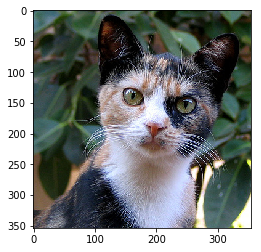

In [24]:
# Turn the PIL image into a numpy array.  
# Note the 3rd dimension corresponding to rgb color information.
#
data = np.array( img ) 
print('image shape: ', data.shape)
plt.imshow(data)

(354, 354, 3)


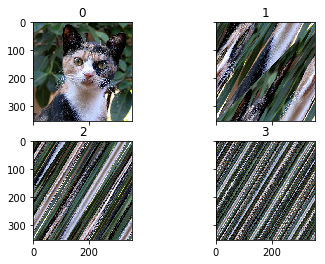

In [25]:
# show the results for three successive applications of the cat map
#
newdat = np.array( img )
print(newdat.shape)

fig, axes = plt.subplots(2,2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i,j].imshow( newdat )
        newdat = catmap2(newdat)
        axes[i,j].set_title( str(i*2 + j))
        
# code critique?        

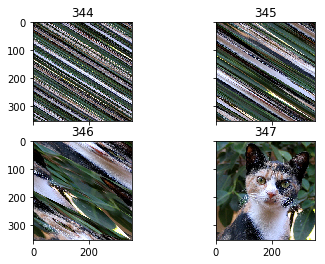

In [26]:
# what happens after 347 iterations?
#
newdat = np.array( img )
for offset in range(345):
    newdat = catmap2(newdat)

fig, axes = plt.subplots(2,2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i,j].imshow( newdat )
        newdat = catmap1(newdat)
        axes[i,j].set_title( str(i*2 + j + offset))

## Questions

1) What are the differences between lists and tuples?

2) Directly calculating the factorial can be difficult.  Check the value for 52! given by Wikipedia using only the Python core if possible, or with additional packages if necessary.

<blockquote cite="https://en.wikipedia.org/wiki/Shuffling#Randomization">
There are exactly 52 factorial (expressed in shorthand as 52!) possible orderings of the cards in a 52-card deck. In other words, there are 52 × 51 × 50 × 49 × ··· × 4 × 3 × 2 × 1 possible combinations of card sequence. This is approximately 8e67 possible orderings or specifically 80,658,175,170,943,878,571,660,636,856,403,766,975,289,505,440,883,277,824,000,000,000,000. The magnitude of this number means that it is exceedingly improbable that two randomly selected, truly randomized decks will be the same. However, while the exact sequence of all cards in a randomized deck is unpredictable, it may be possible to make some probabilistic predictions about a deck that is not sufficiently randomized.
</blockquote>

3) Write a function to apply an "overhand" shuffle 
    
  https://en.wikipedia.org/wiki/Shuffling#Overhand_shuffle    
    
that can be used in the following way:
    
    deck = list( range(52) )
    deck = overhand_shuffle(deck, blocksize=8)
    
where "blocksize" is the number of cards that are moved in each step.

4) It is generally thought that shuffling at least 7 times will effectively randomize a deck of cards.

 https://en.wikipedia.org/wiki/Gilbert%E2%80%93Shannon%E2%80%93Reeds_model

Is this true for the "riffle_shuffle" function?  How is this function different than a real riffle shuffle?

5) Compare the computation time required for the catmap1 and catmap2 functions.

6) Write a function to determine the number of iterations required to map an $N \times N$ image onto itself.  Tabulate the results for $N=2$ to $N=20$ and plot results up to $N=256$.



## Extra

Read about reversible mixing.

https://www.youtube.com/watch?v=UpJ-kGII074

https://io9.gizmodo.com/your-guide-to-one-of-the-coolest-physics-demonstrations-1442968064

https://sciencedemonstrations.fas.harvard.edu/presentations/reversible-fluid-mixing